<a href="https://colab.research.google.com/github/orilib/PyTorch/blob/main/xray_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data source:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [22]:
TRAIN_RUN=True

## Get Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
# path where kaggle.json is present in the Google Drive
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/PyTorchPractice"

Mounted at /content/gdrive


In [3]:
!pip install -q kaggle
!kaggle datasets download paultimothymooney/chest-xray-pneumonia -p ./sample_data

100% 2.29G/2.29G [00:53<00:00, 45.2MB/s]
100% 2.29G/2.29G [00:53<00:00, 45.9MB/s]


In [4]:
# !mv chest-xray-pneumonia.zip sample_data/
%cd ./sample_data
!ls

/content/sample_data
anscombe.json		      chest-xray-pneumonia.zip	README.md
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [5]:
!unzip ./chest-xray-pneumonia.zip -d chest-xray-pneumonia

Streaming output truncated to the last 5000 lines.
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0442-

In [6]:
!ls
%cd chest-xray-pneumonia/chest_xray
!ls

anscombe.json		      chest-xray-pneumonia	mnist_train_small.csv
california_housing_test.csv   chest-xray-pneumonia.zip	README.md
california_housing_train.csv  mnist_test.csv
/content/sample_data/chest-xray-pneumonia/chest_xray
chest_xray  __MACOSX  test  train  val


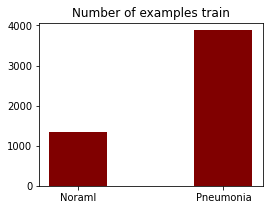

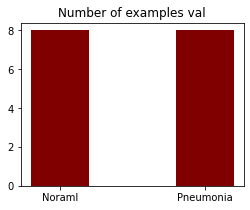

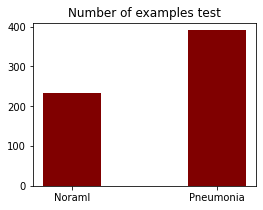

In [7]:
import os
import matplotlib.pyplot as plt

# !ls train/NORMAL/
def get_images(img_path):
    normal_path, pneumonia_path = './'+img_path+'/NORMAL/', './'+img_path+'/PNEUMONIA/'
    normal_images = [normal_path+o.name for o in os.scandir(normal_path) if o.is_file()]
    pneumonia_images = [pneumonia_path+o.name for o in os.scandir(pneumonia_path) if o.is_file()]
    # print(len(normal_images), len(pneumonia_images))   
    fig = plt.figure(figsize = (4, 3))
    # creating the bar plot
    plt.bar(['Noraml', 'Pneumonia'], [len(normal_images), len(pneumonia_images)], color ='maroon', width = 0.4)
    plt.title('Number of examples '+img_path)
    plt.show()    
    return normal_images,pneumonia_images

train_images_0,train_images_1 = get_images('train')
train_images = train_images_0 + train_images_1
val_images_0, val_images_1 = get_images('val')
val_images = val_images_0 + val_images_1 
test_images_0, test_images_1 = get_images('test')
test_images = test_images_0 + test_images_1

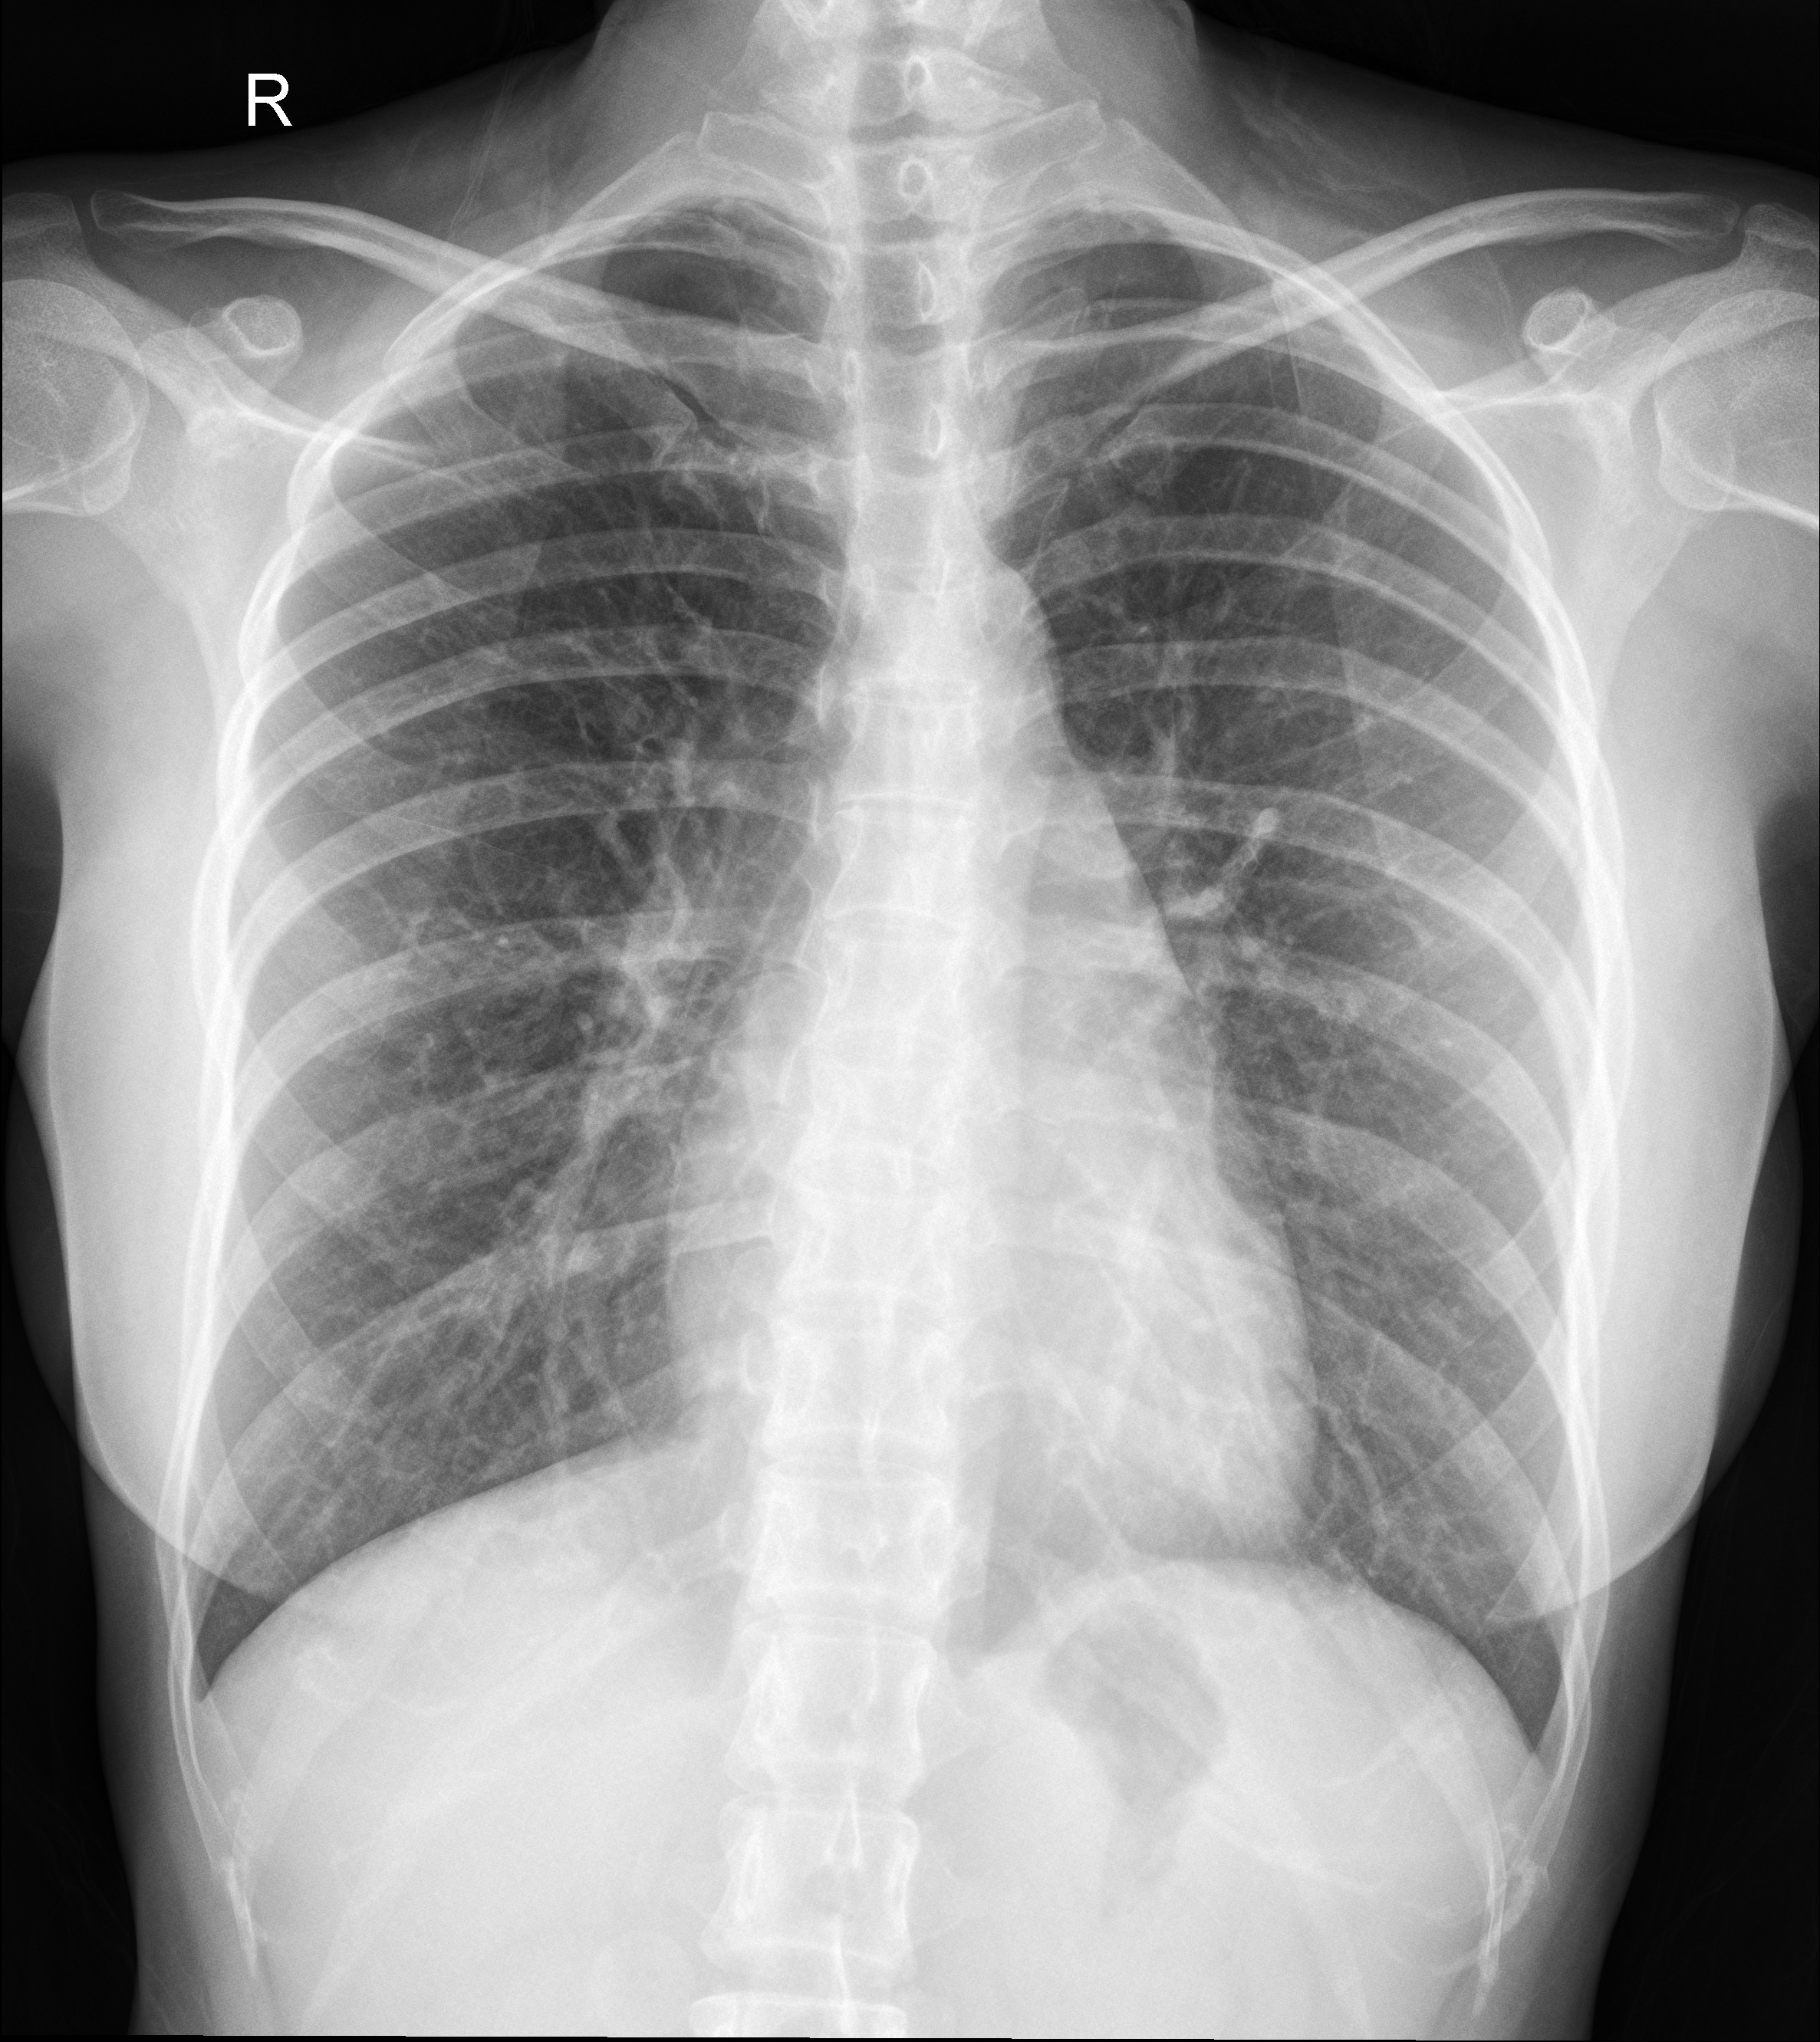

In [8]:
from PIL import Image
# img = Image.open(pneumonia_path+pneumonia_images[0])  
img = Image.open(train_images[0])  
# img.show()
display(img)
# img.size

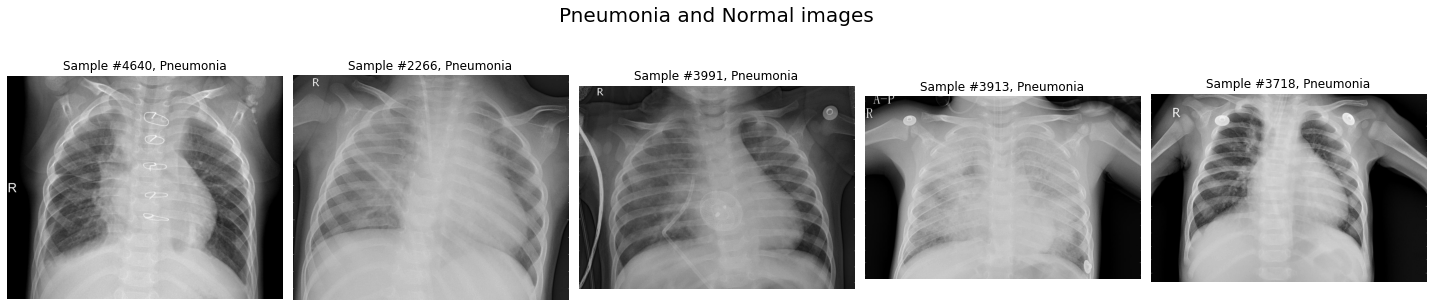

In [9]:
import matplotlib.pyplot as plt
import random
import re
import torch
import numpy as np


def is_Pneumonia(path):
    return re.search("PNEUMONIA", path) != None

def show_images(image_list, number, title=None):
    # fig=plt.figure(figsize=(20, 10))    
    fig = plt.figure(figsize=(min(number,5)*4,5*number/5))
    fig.suptitle(title, fontsize=20)
    for i in range(number):
        img_inx = random.randrange(len(image_list))
        if isinstance(image_list[img_inx], str):
            img = Image.open(image_list[img_inx])
            img = np.asarray(img)
            img_class = 'Pneumonia' if is_Pneumonia(image_list[img_inx]) else 'Normal'
        else: 
            img = image_list[img_inx][0]
            img_class = image_list[img_inx][1]
        ax = fig.add_subplot(number/5, min(number,5), i + 1)
        # ax = plt.subplot(number/5, min(number,5), i + 1)
        
        ax.set_title('Sample #{}, {}'.format(img_inx, img_class))
        plt.axis('off')
        fig.tight_layout()

        if img.ndim == 3 and img.shape[0] > 1:
            if type(img) == torch.Tensor:
                plt.imshow(img.permute(1, 2, 0), )    
            else:
                plt.imshow(img, )    
        else:
            plt.imshow(img.squeeze(), cmap='gray',)         
            # plt.imshow(img, cmap='gray',)
    plt.show()

show_images(train_images, 5, 'Pneumonia and Normal images')




In [10]:
# show_images(normal_images, 5, 'Normal images')

In [11]:
import numpy as np
import re
img = Image.open(train_images[5])  
img.size
imgnp = np.asarray(img)
# imgnp = img.numpy()
# img.
imgnp.min(), imgnp.max()
imgnp.ndim
assert imgnp.ndim==2
# a_path = pneumonia_images[5]
# a_path
# print(re.search("NORMAL", a_path))
# print(re.search("PNEUMONIA", a_path))
# re.search("PNEUMONIA", a_path) != None


In [100]:
from torch.utils.data import Dataset, DataLoader
## Dataset
import re
class xray_Dataset():
    def __init__(self, filelist, transform = None):        
        # super().__init__(self)
        self.filelist = filelist        
        self.transform = transform
    def __len__(self): return int(len(self.filelist))
    def __getitem__(self,index):
        imgpath = self.filelist[index]
        img = Image.open(imgpath)
        if self.transform is not None: img = self.transform(img)        
        img = np.asarray(img).squeeze()
        # print(index, img.ndim, img.shape)    
        if img.ndim==2 and img.shape[0] != 3:
            # assert img.ndim==2  
            img = np.stack((img,img,img),axis=0)       
        img = torch.Tensor(img)
        label = int(re.search("PNEUMONIA", imgpath) != None)
        
        return (img,label)

In [135]:
def show_batch_images(image_list, number, title=None):    
    fig = plt.figure(figsize=(min(number,5)*4,5*number/5))
    fig.suptitle(title, fontsize=20)
    for i in range(number):        
        # print(image_list[img_inx])
        if len(image_list[0])==2: # dataset
            img_inx = random.randrange(len(image_list))
            img, img_class = image_list[img_inx][0], image_list[img_inx][1]
        else: # dataloader
            img_inx = random.randrange(len(image_list[0]))
            img, img_class = image_list[0][img_inx], image_list[1][img_inx]
        ax = fig.add_subplot(number/5, min(number,5), i + 1)                
        ax.set_title('Sample #{}, {}'.format(img_inx, img_class))
        plt.axis('off')
        fig.tight_layout()
        # if img.ndim == 3 and img.shape[0] > 1:
        if type(img) == torch.Tensor:
            plt.imshow(img.permute(1, 2, 0), )    
        else:
            print(img_inx,img)
            # plt.imshow(img, )    
        
        # else:
            # plt.imshow(img.squeeze(), cmap='gray',)         
            # plt.imshow(img, cmap='gray',)
    plt.show()

In [33]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
## Transforms
# resize to 224x224?
basic_data_transform = transforms.Compose([
    transforms.Resize(224),
    # transforms.ColorJitter(),
    transforms.RandomCrop(224),
    #transforms.RandomHorizontalFlip(),
    # transforms.Resize(128),
    transforms.ToTensor()
])

In [14]:
train_images[:5]

['./train/NORMAL/NORMAL2-IM-0994-0001.jpeg',
 './train/NORMAL/NORMAL2-IM-0771-0001.jpeg',
 './train/NORMAL/IM-0419-0001.jpeg',
 './train/NORMAL/IM-0278-0001.jpeg',
 './train/NORMAL/IM-0472-0001.jpeg']

In [15]:
# train_ds = Dataset(train_images)
train_ds = xray_Dataset(train_images, basic_data_transform)
val_ds = xray_Dataset(val_images, basic_data_transform)
test_ds = xray_Dataset(test_images, basic_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

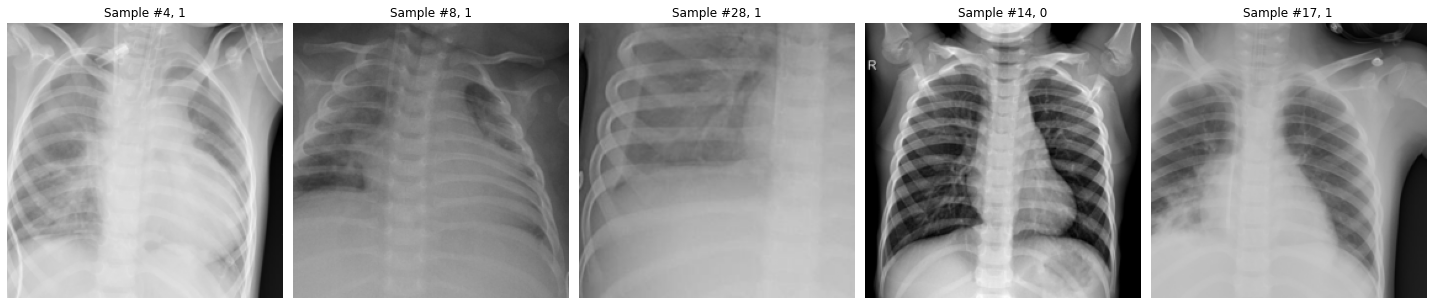

In [16]:
temp = iter(train_dl).next()
# temp[1][2]
# len(temp[0])
show_batch_images(iter(train_dl).next(), 5, title=None)



## Create Model


In [17]:
import torchvision.models as models
import torch.nn as nn
resnet_model = models.resnet18(pretrained = True)

# add clasifier for 30 outputs
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_ftrs, 2)
# model2.fc = nn.Sequential(
#         nn.Linear(num_ftrs, 30),
#         torch.reshape((-1,15,2))
# )

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


## Train

In [18]:

model = resnet_model
lr=0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)


In [19]:
def fit(dataloader_train, dataloader_val, epochs=3):
    itr = 1
    p_itr = 20
    # model.train()
    total_loss = 0
    loss_list, val_loss_list = [], []
    acc_list, val_acc_list = [], []
    for epoch in range(epochs):
        total_loss = 0
        model.train()
        for samples, labels in dataloader_train: # run over the mini batches
            # get the inputs; data is a list of [inputs, labels]
            samples, labels = samples.to(device), labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            output = model(samples)
            loss = criterion(output, labels.long())
            loss.backward()
            optimizer.step()        
            # scheduler.step()        
            # print statistics every p_itr iterations
            total_loss += loss.item()
            itr += 1
            if itr % p_itr == 0:
                pred = torch.argmax(output, dim=1)
                # print(f'predictions: {pred}')
                correct = pred.eq(labels)
                # print(f'labels: {labels}')
                # print(f'correct: {correct}')
                acc = torch.mean(correct.float())
                # print(f'accyracy: {acc}')
                print('[Epoch {}/{}] Iteration {} -> Train Loss: {:.4f}, Accuracy: {:.3f}'\
                        .format(epoch+1, epochs, itr, total_loss/p_itr, acc))
                loss_list.append(total_loss/p_itr)
                acc_list.append(acc)
                total_loss = 0
                # break                   

        # Run a validation loop at the end of each epoch
        total_loss = 0
        model.eval()
        for samples, labels in dataloader_val:
            samples, labels = samples.to(device), labels.to(device)            
            output = model(samples)
            loss = criterion(output, labels.long())            
            total_loss += loss.item()
            pred = torch.argmax(output, dim=1)
            # print(f'predictions: {pred}')
            correct = pred.eq(labels)
            # print(f'labels: {labels}')
            # print(f'correct: {correct}')
            acc = torch.mean(correct.float())
            # print(f'accuracy: {acc}')
            print('[Epoch {}/{}] -> Val Loss: {:.4f}, Accuracy: {:.3f}'\
            .format(epoch+1, epochs, total_loss, acc))
            val_loss_list.append(total_loss)
            val_acc_list.append(acc)
            total_loss = 0

            
    print('Finished Training')

    plt.plot(loss_list, label='loss')
    plt.plot(acc_list, label='accuracy')
    plt.legend()
    plt.title('training loss and accuracy')
    plt.show()

    plt.plot(val_loss_list, label='loss')
    plt.plot(val_acc_list, label='accuracy')
    plt.legend()
    plt.title('validation loss and accuracy')
    plt.show()



[Epoch 1/5] Iteration 20 -> Train Loss: 0.2843, Accuracy: 0.875
[Epoch 1/5] Iteration 40 -> Train Loss: 0.1309, Accuracy: 0.906
[Epoch 1/5] Iteration 60 -> Train Loss: 0.1281, Accuracy: 0.938
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0820, Accuracy: 1.000
[Epoch 1/5] Iteration 100 -> Train Loss: 0.1057, Accuracy: 1.000
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0809, Accuracy: 1.000
[Epoch 1/5] Iteration 140 -> Train Loss: 0.0587, Accuracy: 1.000
[Epoch 1/5] Iteration 160 -> Train Loss: 0.0754, Accuracy: 0.969
[Epoch 1/5] -> Val Loss: 2.8111, Accuracy: 0.500
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0868, Accuracy: 0.969
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0762, Accuracy: 1.000
[Epoch 2/5] Iteration 220 -> Train Loss: 0.1072, Accuracy: 1.000
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0549, Accuracy: 0.969
[Epoch 2/5] Iteration 260 -> Train Loss: 0.1037, Accuracy: 1.000
[Epoch 2/5] Iteration 280 -> Train Loss: 0.1044, Accuracy: 1.000
[Epoch 2/5] Iteration 300 -> Train Loss: 0.06

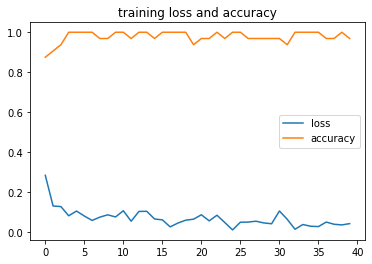

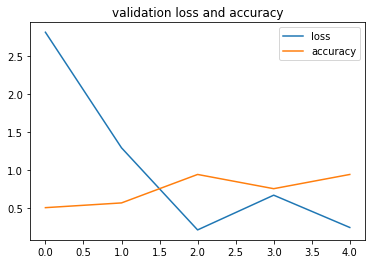

In [23]:
if TRAIN_RUN:
    fit(train_dl, val_dl, epochs=5)

## Test

In [24]:
TRAIN_RUN=True
# ""
SAVED_MODEL_PATH = '/content/gdrive/MyDrive/Colab Notebooks/PyTorchPractice/xray_pneumonia.pth'
def save_model(model):
    torch.save(model, SAVED_MODEL_PATH)
def load_model(model):
    model.load_state_dict(torch.load(SAVED_MODEL_PATH))  

if TRAIN_RUN:
    ## save model    
    save_model(model)
    # torch.save(model, SAVED_MODEL_PATH)
    # torch.save(model.state_dict(), SAVED_MODEL_PATH)
else:
    # load model
    # model = NeuralNetwork()
    load_model(model)
    # model.load_state_dict(torch.load(SAVED_MODEL_PATH))  
    # model = torch.load(SAVED_MODEL_PATH)

model.eval()  

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [26]:
def test_model(model, test_dl):
    expected=[]; predicted=[]
    model.eval()
    for samples, labels in test_dl:
        samples, labels = samples.to(device), labels.to(device)            
        output = model(samples)
        # loss = criterion(output, labels.long())                
        pred = torch.argmax(output, dim=1)
        expected.extend(labels.tolist())
        predicted.extend(pred.tolist())
    return expected, predicted

expected, predicted = test_model(model, test_dl)

In [27]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
def calc_confusion_matrix(expected, predicted):
    results = confusion_matrix(expected, predicted)
    print(results)

    tn, fp, fn, tp = results.ravel() #confusion_matrix(expected, predicted).ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print(f"precision={precision:.4} recall={recall:.4}")
    return results
results = calc_confusion_matrix(expected, predicted)

[[177  57]
 [  6 384]]
precision=0.8707 recall=0.9846


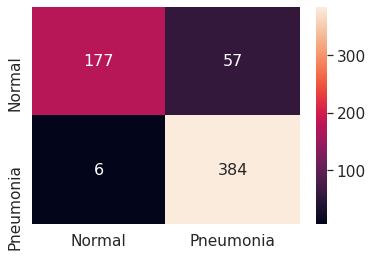

In [28]:
import seaborn as sn
import pandas as pd
def show_confusion_matrix(results):
    df_cm = pd.DataFrame(results, columns = ['Normal', 'Pneumonia'])
    # plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.0f',  xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia']) # font size
    # sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='.0f') # font size
    plt.show()
show_confusion_matrix(results)

In [59]:
# from sklearn.metrics import plot_confusion_matrix
# disp = plot_confusion_matrix(model, X_test, y_test,
#                             display_labels=class_names,
#                             cmap=plt.cm.Blues,
#                             normalize=normalize)
# disp.ax_.set_title(title)

# print(title)
# print(disp.confusion_matrix)

## Retry

#### Add Data augmenatation


In [136]:
from torchvision import transforms
data_transform = transforms.Compose([        
    transforms.Resize(224),        
    transforms.ColorJitter(brightness=0.2, contrast=0, saturation=0, hue=0),
    transforms.RandomRotation(degrees=10), #expand=True        
    transforms.RandomAffine(translate=(0.05,0.05), degrees=0),
    transforms.GaussianBlur(3),    
    transforms.RandomCrop(224),    
    #transforms.RandomHorizontalFlip(),
    # transforms.Resize(128),
    transforms.ToTensor()
])

In [137]:
train_ds = xray_Dataset(train_images, data_transform)
val_ds = xray_Dataset(val_images, basic_data_transform)
test_ds = xray_Dataset(test_images, basic_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

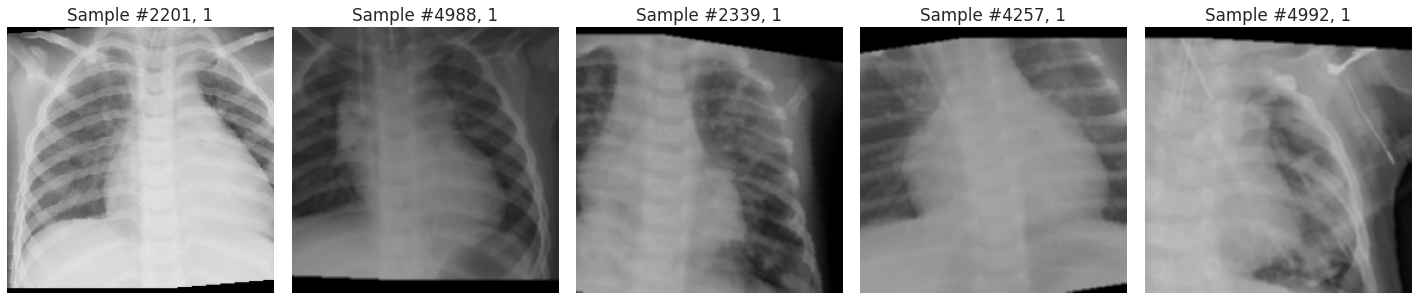

In [138]:
test_ds[0][0]
# show_images(train_images[:2], 5)
# type(train_ds[0][0])
show_batch_images(train_ds, 5)
# plt.imshow(train_images[0][0])
# train_ds[0][0]

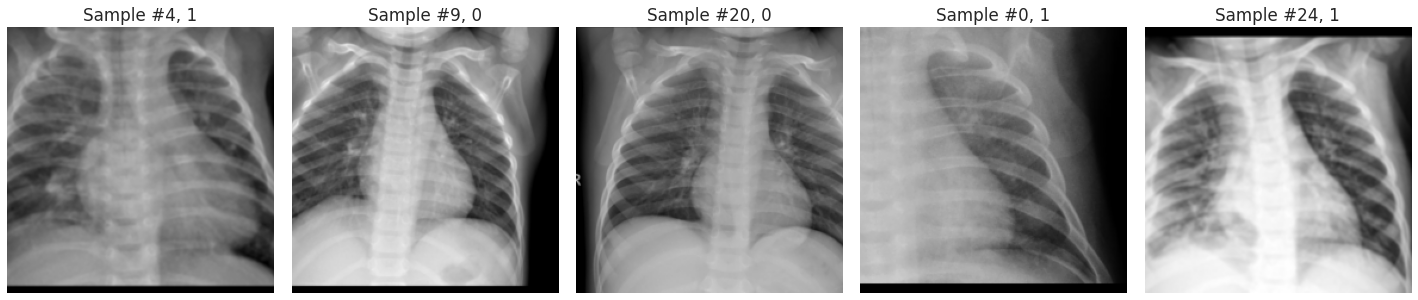

In [58]:
temp = iter(train_dl).next()
# temp[1][2]
# len(temp[0])
show_batch_images(iter(train_dl).next(), 5, title=None)

In [35]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)

[Epoch 1/5] Iteration 20 -> Train Loss: 0.1759, Accuracy: 0.844
[Epoch 1/5] Iteration 40 -> Train Loss: 0.0773, Accuracy: 0.969
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0606, Accuracy: 0.969
[Epoch 1/5] Iteration 80 -> Train Loss: 0.1062, Accuracy: 0.969
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0768, Accuracy: 1.000
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0908, Accuracy: 0.969
[Epoch 1/5] Iteration 140 -> Train Loss: 0.0884, Accuracy: 1.000
[Epoch 1/5] Iteration 160 -> Train Loss: 0.0975, Accuracy: 1.000
[Epoch 1/5] -> Val Loss: 0.1753, Accuracy: 0.938
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0748, Accuracy: 0.938
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0429, Accuracy: 1.000
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0458, Accuracy: 0.938
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0685, Accuracy: 1.000
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0551, Accuracy: 1.000
[Epoch 2/5] Iteration 280 -> Train Loss: 0.0754, Accuracy: 0.969
[Epoch 2/5] Iteration 300 -> Train Loss: 0.08

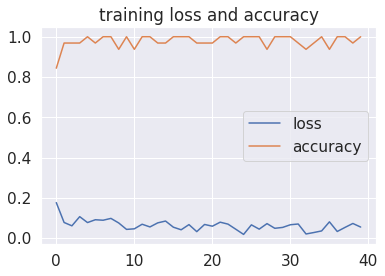

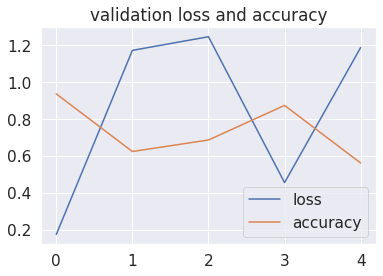

In [36]:
fit(train_dl, val_dl, epochs=5)

[[ 98 136]
 [  0 390]]
precision=0.7414 recall=1.0


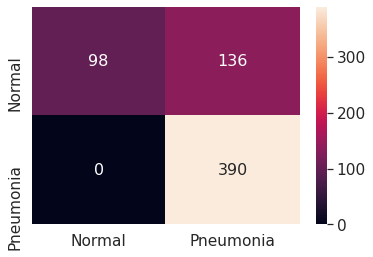

In [37]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

#### Add classes reweighting
weights are oposite to the distribution to balance back the loss with the imbalanced data

In [143]:
train_ds = xray_Dataset(train_images, basic_data_transform)
val_ds = xray_Dataset(val_images, basic_data_transform)
test_ds = xray_Dataset(test_images, basic_data_transform)

## Dataloader
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=0)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False, num_workers=0)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

In [144]:
train_normal, train_pnoeumania = (len(train_images_0),len(train_images_1))
sum_train = train_normal + train_pnoeumania

weight = torch.Tensor([train_pnoeumania/sum_train, train_normal/sum_train])
weight
criterion = nn.CrossEntropyLoss(weight=weight)


In [145]:
model = resnet_model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr, amsgrad=True)

[Epoch 1/5] Iteration 20 -> Train Loss: 0.0407, Accuracy: 0.969
[Epoch 1/5] Iteration 40 -> Train Loss: 0.0621, Accuracy: 1.000
[Epoch 1/5] Iteration 60 -> Train Loss: 0.0708, Accuracy: 1.000
[Epoch 1/5] Iteration 80 -> Train Loss: 0.0946, Accuracy: 0.875
[Epoch 1/5] Iteration 100 -> Train Loss: 0.0266, Accuracy: 1.000
[Epoch 1/5] Iteration 120 -> Train Loss: 0.0243, Accuracy: 1.000
[Epoch 1/5] Iteration 140 -> Train Loss: 0.0294, Accuracy: 1.000
[Epoch 1/5] Iteration 160 -> Train Loss: 0.0062, Accuracy: 1.000
[Epoch 1/5] -> Val Loss: 0.3309, Accuracy: 0.812
[Epoch 2/5] Iteration 180 -> Train Loss: 0.0075, Accuracy: 1.000
[Epoch 2/5] Iteration 200 -> Train Loss: 0.0159, Accuracy: 1.000
[Epoch 2/5] Iteration 220 -> Train Loss: 0.0271, Accuracy: 0.969
[Epoch 2/5] Iteration 240 -> Train Loss: 0.0416, Accuracy: 1.000
[Epoch 2/5] Iteration 260 -> Train Loss: 0.0306, Accuracy: 1.000
[Epoch 2/5] Iteration 280 -> Train Loss: 0.0277, Accuracy: 0.969
[Epoch 2/5] Iteration 300 -> Train Loss: 0.04

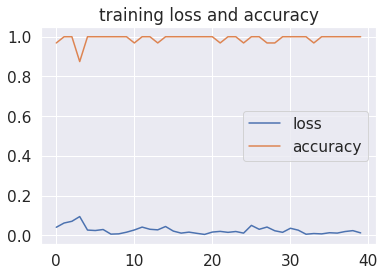

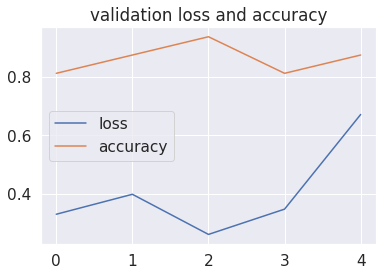

In [146]:
fit(train_dl, val_dl, epochs=5)

[[132 102]
 [  2 388]]
precision=0.7918 recall=0.9949


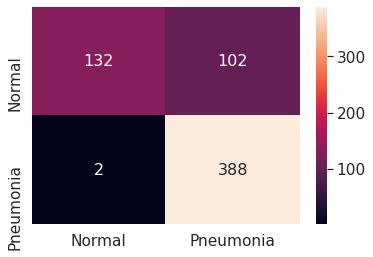

In [147]:
expected, predicted = test_model(model, test_dl)
results = calc_confusion_matrix(expected, predicted)
show_confusion_matrix(results)

[[136  98]
 [  2 388]]
precision=0.7984 recall=0.9949

#### show incorrect results

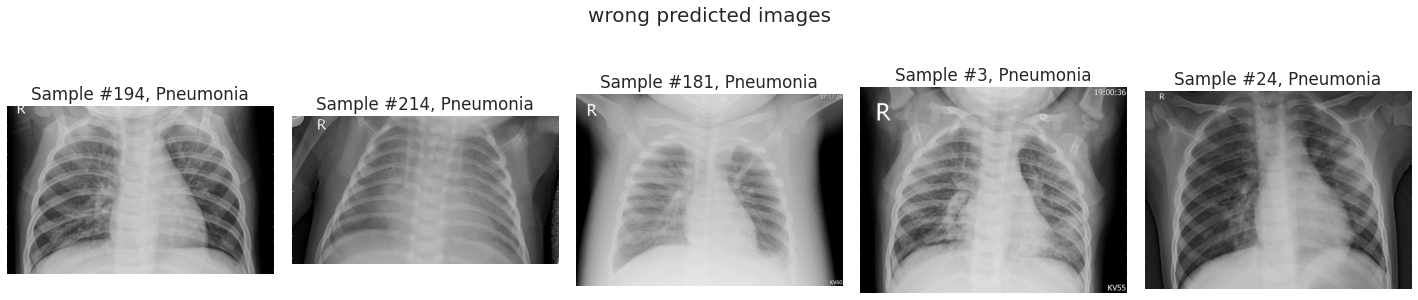

In [155]:
bad_predictions = (np.array(expected) != np.array(predicted))
indexes = np.where(bad_predictions)[0]
wrong_test_samples = [test_images[inx] for inx in indexes]
show_images(wrong_test_samples, 5, 'wrong predicted images')

## Problems
 *  image sizes are not the same